# Seasons Clustering

In [1]:
import re, nltk
import numpy as np
import matplotlib.pyplot as plt

## Read in the corpus and get the vocabulary, as usual

In [2]:
from seasons_module import load_seasons_corpus
seasons_corpus = load_seasons_corpus()
fnames = list(seasons_corpus.keys())
docs = [seasons_corpus[fname][0] for fname in fnames]

In [3]:
set_vocab = set([])
for doc in docs:
    set_vocab = set_vocab.union(set(doc))
f = open("lists/seasons_stop_list.txt")
stop_list = set(f.read().split("\n"))
pruned_vocab = set(sorted([w for w in list(set_vocab) if w not in stop_list]))

In [4]:
import nltk
word_fdist = nltk.FreqDist() # the corpus frequences
doc_fdist = nltk.FreqDist()# the document frequencies
for word in pruned_vocab:
    word_fdist[word] = 0
    doc_fdist[word] = 0
    for doc in docs:
        if word in doc:
            doc_fdist[word] += 1
            word_fdist[word] += doc.count(word)

In [5]:
vocab_list = [w[0] for w in word_fdist.most_common(500)]

## Get the document vectors

In [6]:
import numpy as np
def norm_vec(vec):
    mag = np.dot(vec, vec)
    if mag == 0:
        return vec
    else:
        return(vec / np.sqrt(mag))
    
def pure_tf(tf, df, cf, N):
    return tf

def tf(tf, df, cf, N):
    if tf == 0:
        result = 0
    else:
        result = (1 + np.log(tf))
    return result

def tfidf(tf, df, cf, N):
    if tf == 0 or df == 0:
        result = 0
    else:
        result = (1 + np.log(tf)) / df
    return result

def weight_factor2(tf, df, cf, N):
    if tf == 0:
        result = 0
    else:
        result = (1 + np.log(tf))
    return result

def weighted_word(the_text, word):
    return tf(the_text.count(word), doc_fdist[word], word_fdist[word], len(seasons_corpus.keys()))

def compute_doc_vector(word_list):
    return norm_vec([weighted_word(word_list, word) for word in vocab_list])

In [7]:
doc_vectors = []
for doc in docs:
    doc_vectors.append(compute_doc_vector(doc))

Put vectors in a matrix to make sklean happy

In [8]:
X = np.array(doc_vectors)

In [9]:
X.shape

(54, 500)

## Do the clustering

In [10]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=3).fit(X)

## Examine the results

In [11]:
from sklearn.neighbors import NearestCentroid
def get_centroids(X, labels):
    clf = NearestCentroid()
    clf.fit(X, labels)
    centroids = clf.centroids_
    return centroids

centroids = get_centroids(X, clustering.labels_)

In [12]:
def top_words_from_centroid(centroids, n, to_print=10, printit=True):
    sc = list(np.argsort(centroids[n]))
    sc.reverse()
    result = []
    for i in range(to_print):
        if printit:
            print(vocab_list[sc[i]], round(centroids[n][sc[i]], 3))
        result.append([vocab_list[sc[i]], round(centroids[n][sc[i]], 3)])
    return result

def top_words_from_centroids(centroids, to_print=10, printit=False):
    result = []
    for n in range(len(centroids)):
        if printit:
            print("Cluster ", n)
            top_words_from_centroid(centroids, n, to_print, printit=printit)
            print("\n")
        result.append(top_words_from_centroid(centroids, n, to_print, printit=printit))
    return result
        
class ListTable(list):
    def _repr_html_(self):
        html = ["<table style= 'border: 1px solid black; display:inline-block'>"]
        for row in self:
            html.append("<tr>")
            for col in row:
                html.append("<td align='left' style='border: .5px solid gray;'>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)
    
class MultiTable(list):
    def _repr_html_(self):
        html = []
        for l in self:
            html.append("<table style= 'border: 1px solid black; display:inline-block; margin-right: 10px;'>")
            for row in l:
                html.append("<tr>")
                for col in row:
                    html.append("<td align='left' style='border: .5px solid gray;'>{0}</td>".format(col))

                html.append("</tr>")
            html.append("</table>")
        return ''.join(html)

In [13]:
MultiTable(top_words_from_centroids(centroids))

closer,0.134
axis,0.125
side,0.108
colder,0.105
time,0.102
day,0.093
farther,0.087
night,0.083
part,0.081
warmer,0.08
tilted,0.325


In [14]:
res = []
for n, fname in enumerate(fnames):
    res.append([fname, clustering.labels_[n]])
ListTable(res)

vanessapre,0
-vanessapost,0
-williampost,0
lesliepre,0
zeldapre,1
williampre,0
-jacobpost,0
-marthapost,1
-robbiepost,2
kurtpre,0
angelapre,0


## Examine some metrics

In [15]:
def compute_rss(X, centroids, labels):
    rss = 0
    for dnum in range(X.shape[0]):
        vec = X[dnum]
        centroid = centroids[labels[dnum]]
        res_vec = vec - centroid
        rss += np.dot(res_vec, res_vec)
    return rss

def compute_rss_data_agglomerative(X, start, end):
    results = []
    for k in range(start, end):
        clusterer = AgglomerativeClustering(n_clusters=k, linkage="ward", affinity="euclidean")
        clusterer.fit(X)
        labels = clusterer.labels_
        centroids = get_centroids(X, labels)
        rss = compute_rss(X, centroids, labels)
        results.append([k, rss])
    return results

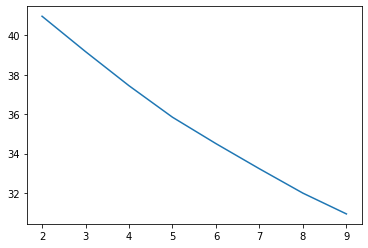

In [16]:
rss_list = compute_rss_data_agglomerative(X, 2, 10)
plt.clf()
x = [res[0] for res in rss_list]
y = [res[1] for res in rss_list]
plt.plot(x, y)

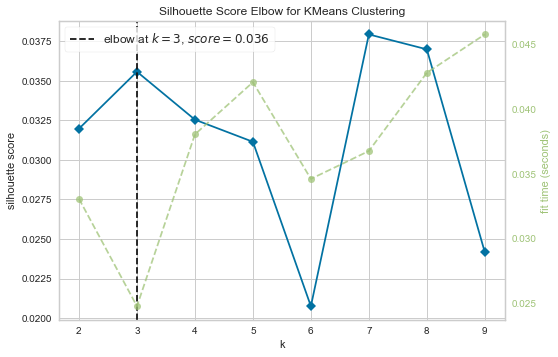

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [17]:
from yellowbrick.cluster import KElbowVisualizer 
from sklearn.cluster import KMeans
clusterer = KMeans()
visualizer = KElbowVisualizer(clusterer, k=(2, 10), metric="silhouette")
visualizer.fit(X)
visualizer.poof()